INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
c:\ProgramData\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
C:\Users\Student.CIM-137DATEV-04.000\AppData\Local\Temp\ipykernel_19072\2316842285.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slic

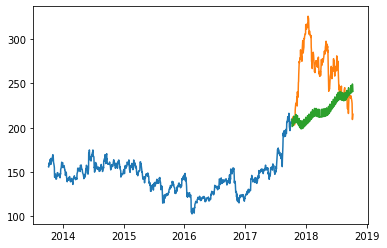

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

df = pd.read_csv('test.csv')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

train = new_data[:987]
valid = new_data[987:]

model = Prophet()
model.fit(train)

close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)
forecast_valid = forecast['yhat'][987:]

valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values
plt.plot(train['y'])
plt.plot(valid[['y', 'Predictions']])